# Lasso and Ridge Regression

#### Build a multilinear regression model with lasso and ridge regularization on car features dataset to improve the prediction based on the input features. Identify the attributes that affect the car price.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
tc_df = pd.read_csv(r"D:\360digi\DS\Sharath\LogisticReg2_Lasso_Ridge\handson\Datasets_LassoRidge\ToyotaCorolla.csv", encoding= 'unicode_escape')
tc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
# Consider only these columns for our analysis: price, age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, and Weight.
df = tc_df.iloc[:,[2, 3, 6, 8, 12, 13, 15, 16, 17 ]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
# check missing values
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

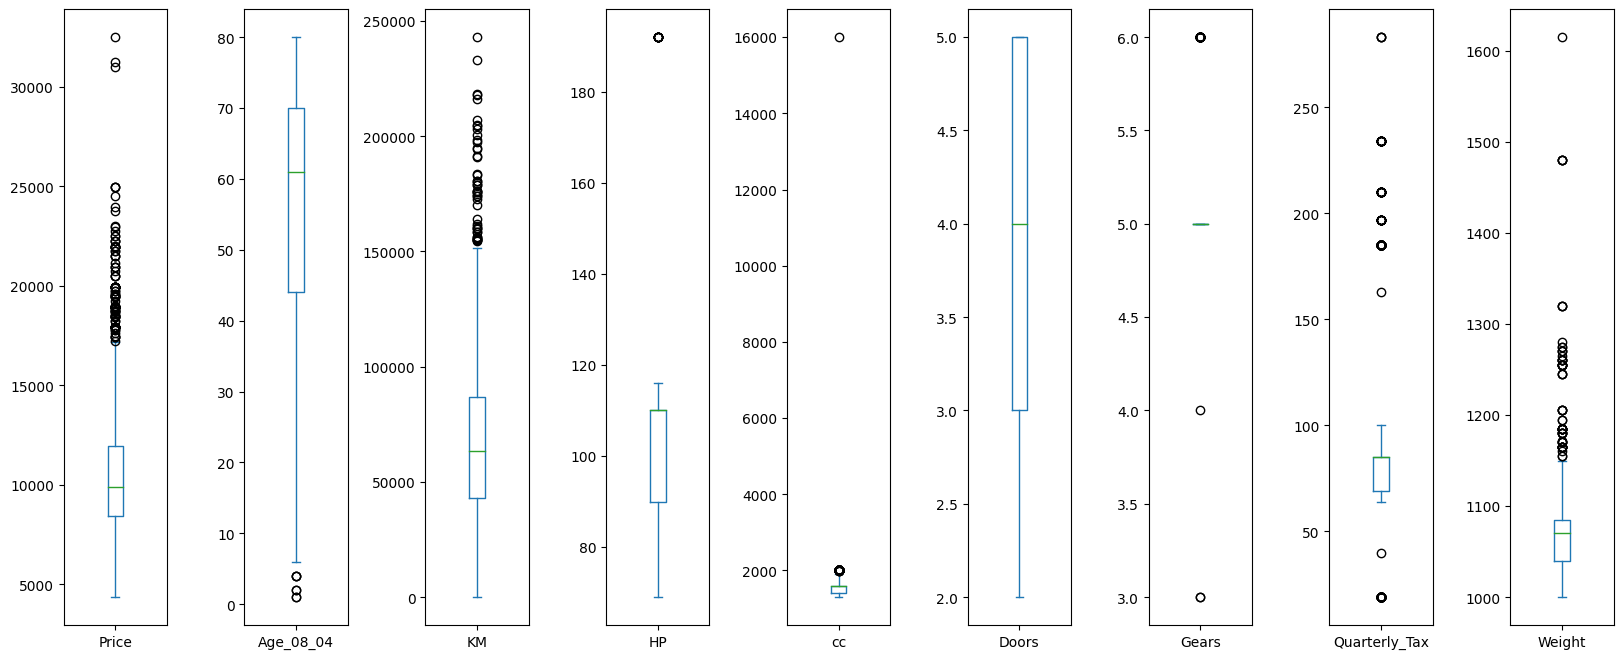

In [8]:
# box plot visualisation
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (20,8))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [9]:
df.Gears.unique()

array([5, 6, 3, 4], dtype=int64)

In [10]:
# Seperating input and output variables 
X = pd.DataFrame(df.iloc[:, 1:])
Y = pd.DataFrame(df.iloc[:, 0])

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [12]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
dtypes: int64(1)
memory usage: 11.3 KB


# Data Preprocessing

In [13]:
# Select numeric features for data preprocessing
numeric_features = X.select_dtypes(exclude = ['object']).columns
print(numeric_features)

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')


In [18]:
# Input columns ['Gears'] have low variation for method 'iqr'. So excluding it from winsorization
numeric_features = numeric_features.drop(['Gears'], errors='raise')
numeric_features

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax', 'Weight'], dtype='object')

In [19]:
# Winsorization for outlier treatment
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = list(numeric_features))
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax',
                      'Weight'])

In [20]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['Age_08_04', 'KM', 'HP', 'cc', 'Doors',
                                       'Quarterly_Tax', 'Weight']))])

In [21]:
preprocessor1 = ColumnTransformer(transformers = [('wins', outlier_pipeline, numeric_features)])
print(preprocessor1)

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Age_08_04',
                                                                        'KM',
                                                                        'HP',
                                                                        'cc',
                                                                        'Doors',
                                                                        'Quarterly_Tax',
                                                                        'Weight']))]),
                                 Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax'

In [22]:
clean = preprocessor1.fit(X)
clean

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Age_08_04',
                                                                        'KM',
                                                                        'HP',
                                                                        'cc',
                                                                        'Doors',
                                                                        'Quarterly_Tax',
                                                                        'Weight']))]),
                                 Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax'

In [23]:
cleandata1 = pd.DataFrame(clean.transform(X), columns = numeric_features)
cleandata1.head()

,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight
0,23.0,46986.0,90.0,1900.0,3.0,109.0,1152.5
1,23.0,72937.0,90.0,1900.0,3.0,109.0,1152.5
2,24.0,41711.0,90.0,1900.0,3.0,109.0,1152.5
3,26.0,48000.0,90.0,1900.0,3.0,109.0,1152.5
4,30.0,38500.0,90.0,1900.0,3.0,109.0,1152.5


In [25]:
clean_data = pd.concat([cleandata1, df.Gears], axis = 1)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age_08_04      1436 non-null   float64
 1   KM             1436 non-null   float64
 2   HP             1436 non-null   float64
 3   cc             1436 non-null   float64
 4   Doors          1436 non-null   float64
 5   Quarterly_Tax  1436 non-null   float64
 6   Weight         1436 non-null   float64
 7   Gears          1436 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 89.9 KB


In [26]:
numeric_features = X.select_dtypes(exclude = ['object']).columns
print(numeric_features)

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')


In [27]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) 

scale = scale_columntransfer.fit(clean_data)

In [28]:
scaled_data = pd.DataFrame(scale.transform(clean_data), columns = numeric_features)
scaled_data.describe()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,0.679452,0.441709,0.452166,0.430942,0.677809,0.675487,0.533905,0.449701
std,0.247553,0.226974,0.185175,0.281617,0.317559,0.062837,0.229947,0.247702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.520000,0.280946,0.295775,0.166667,0.333333,0.666667,0.375000,0.262295
50%,0.746667,0.414166,0.577465,0.500000,0.666667,0.666667,0.625000,0.459016
75%,0.866667,0.568567,0.577465,0.500000,1.000000,0.666667,0.625000,0.557377
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


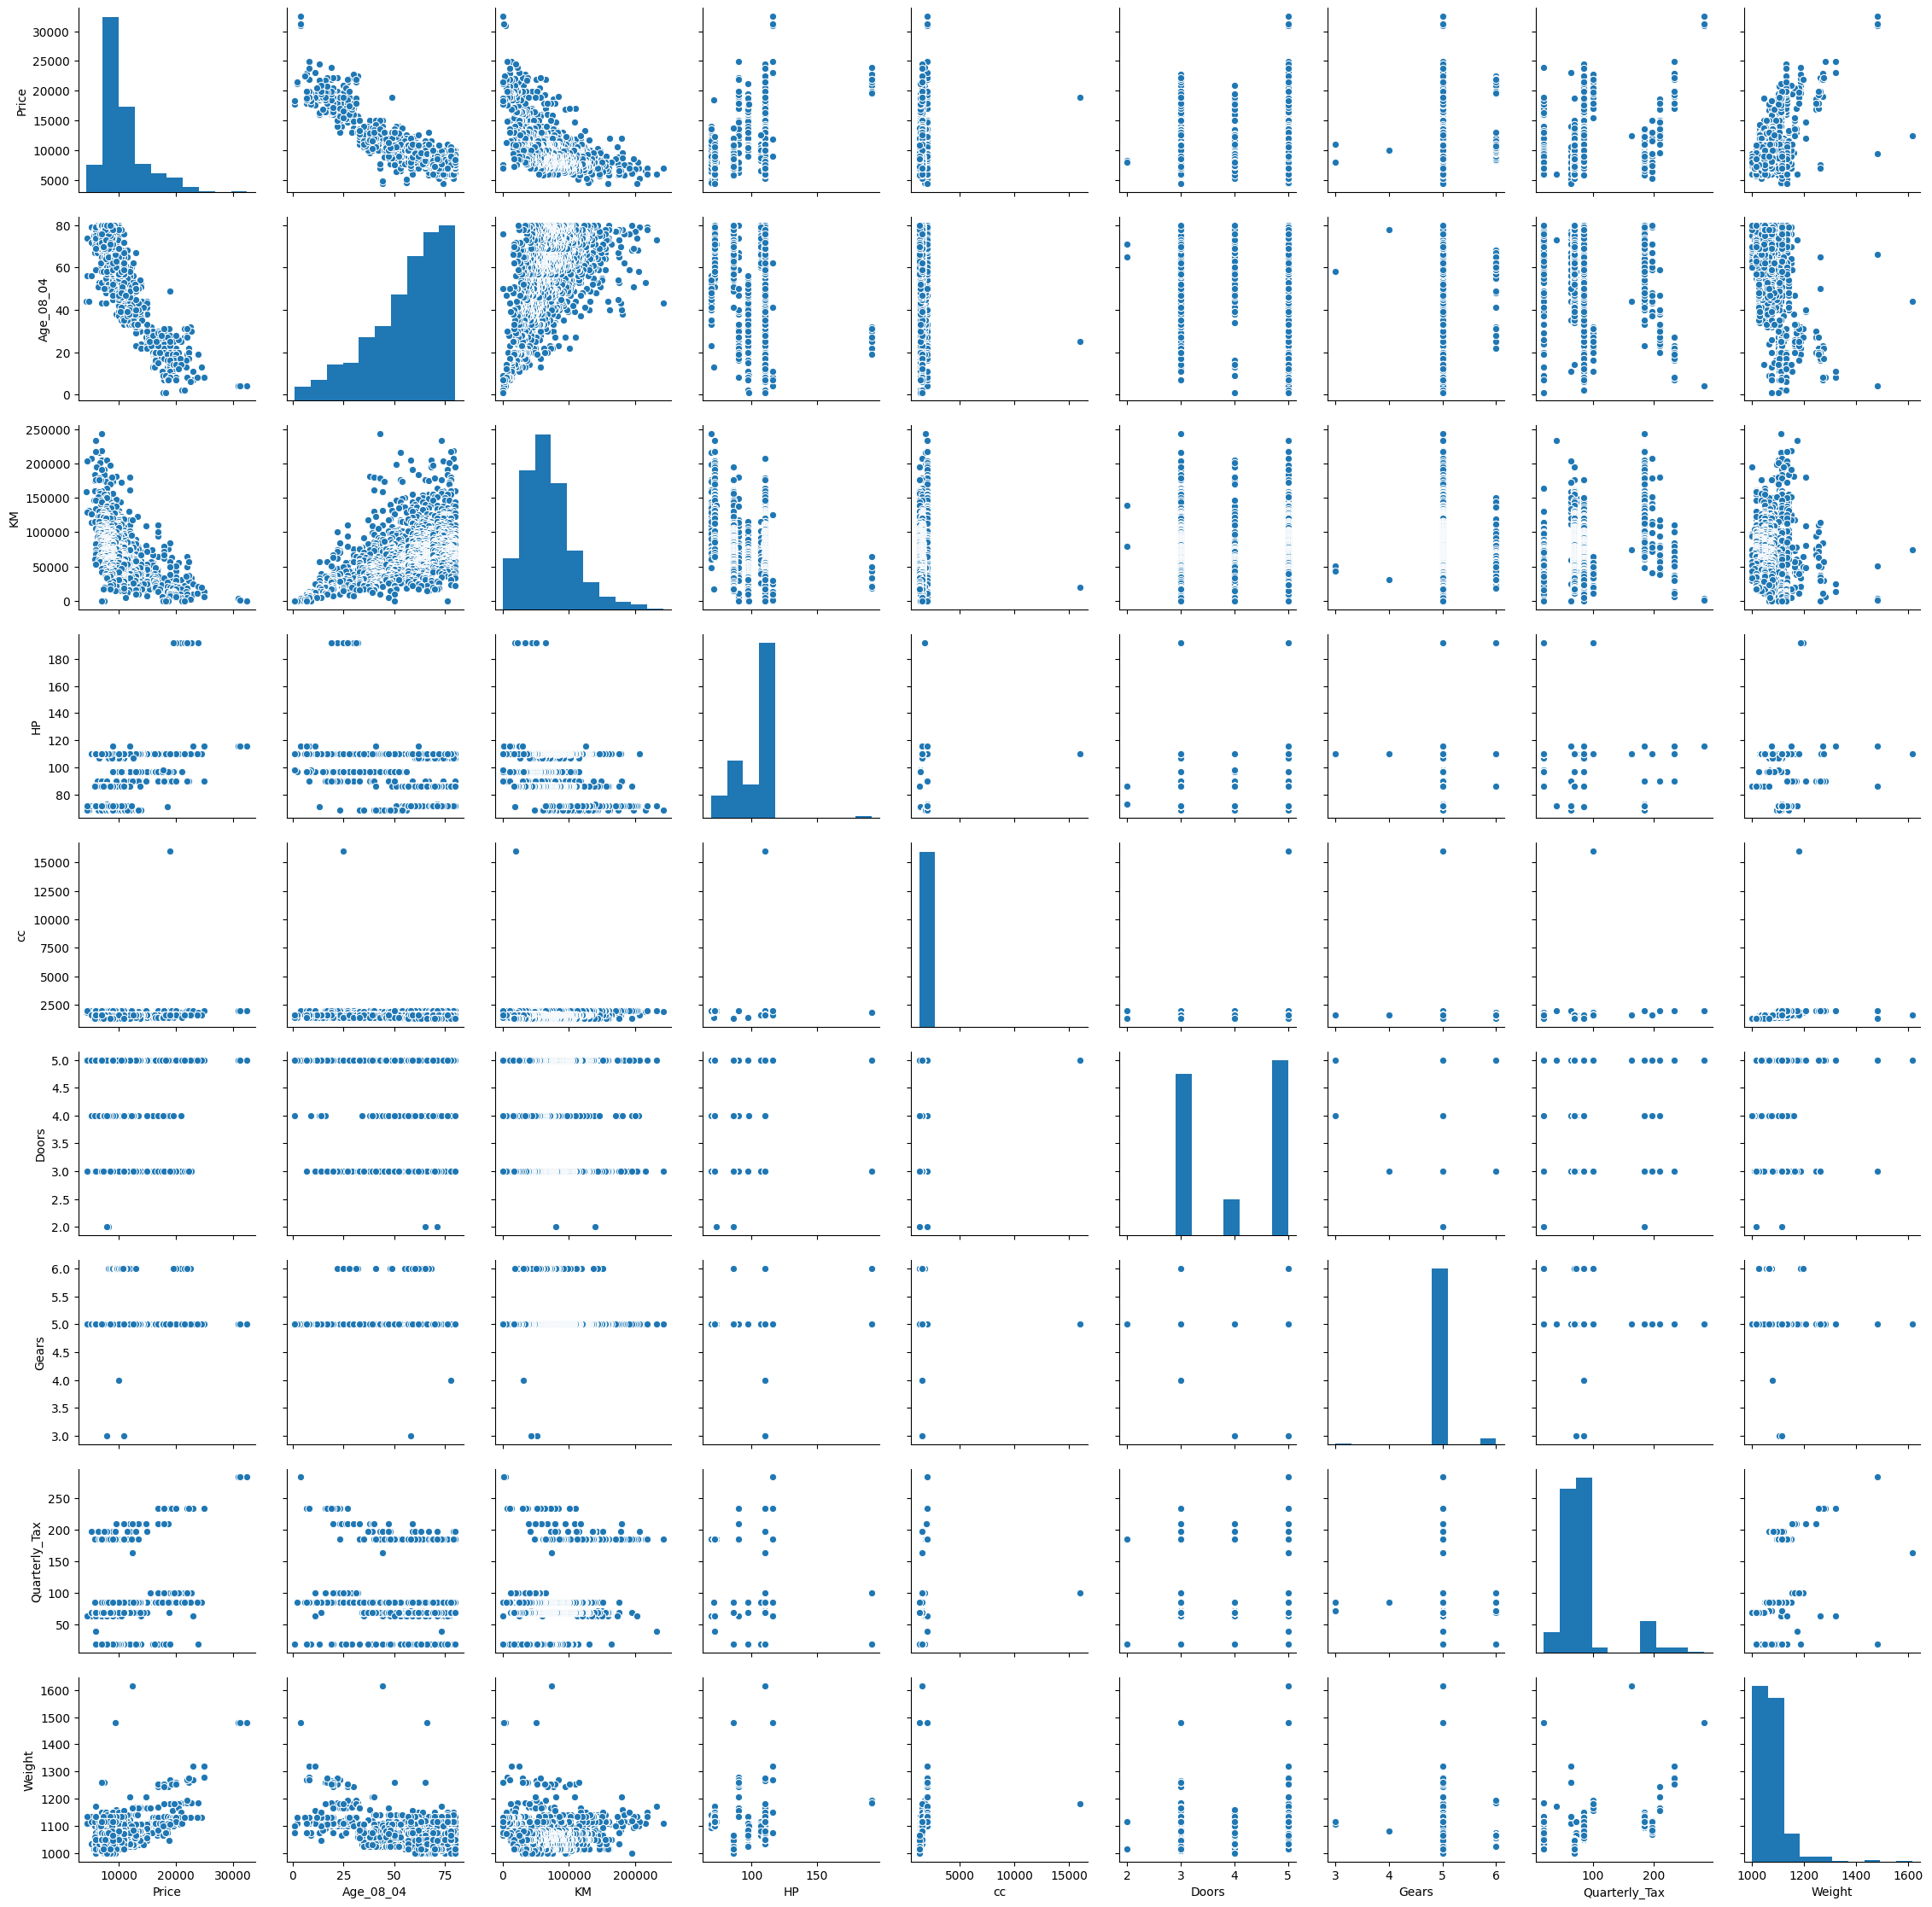

In [29]:
# Multivariate Analysis
sns.pairplot(df)

In [30]:
# Correlation Analysis on Original Data
orig_df_cor = df.corr()
orig_df_cor

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [ ]:
# Collinearity between input pairs observed:
# KM - Age_08_04 : 0.5056
# Weight - Quarterly_Tax : 0.63 

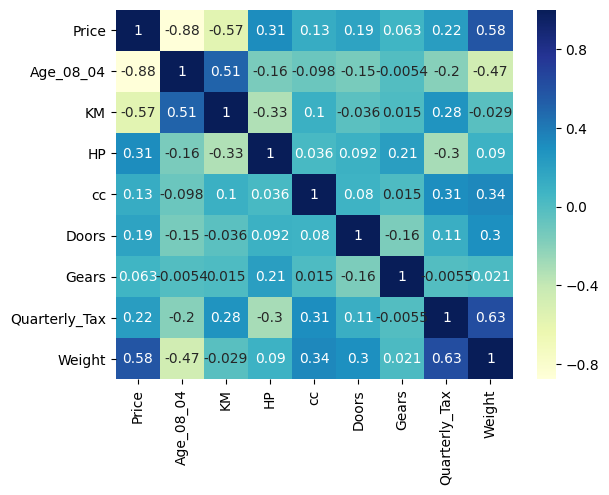

In [31]:
# Heatmap
dataplot = sns.heatmap(orig_df_cor, annot = True, cmap = "YlGnBu")

# Multiple Linear Regression

In [32]:
C = add_constant(clean_data)
C.head()

,const,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax,Weight,Gears
0,1.0,23.0,46986.0,90.0,1900.0,3.0,109.0,1152.5,5
1,1.0,23.0,72937.0,90.0,1900.0,3.0,109.0,1152.5,5
2,1.0,24.0,41711.0,90.0,1900.0,3.0,109.0,1152.5,5
3,1.0,26.0,48000.0,90.0,1900.0,3.0,109.0,1152.5,5
4,1.0,30.0,38500.0,90.0,1900.0,3.0,109.0,1152.5,5


In [34]:
basemodel = sm.OLS(Y, C).fit()
basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     969.5
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:45:55   Log-Likelihood:                -12470.
No. Observations:                1436   AIC:                         2.496e+04
Df Residuals:                    1427   BIC:                         2.501e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.585e+04   2031.352     -7.803      0.000   -1.98e+04   -1.19e+04
Age_08_04      -121.3322      2.974    -40.798      0.000    -127.166    -115.498
KM               -0.0199      0.002    -13.122      0.000      -0.023      -0.017
HP               37.1740      3.376     11.012      0.000      30.552      43.796
cc               -2.7214      0.388     -7.014      0.000      -3.483      -1.960
Doors          -141.7319     46.327     -3.059      0.002    -232.609     -50.855
Quarterly_Tax    13.7554      3.621      3.799      0.000       6.653      20.858
Weight           29.2546      2.011     14.544      0.000      25.309      33.200
Gears           680.6730    209.258      3.253      0.001     270.187    1091.159
==============================================================================
Omnibus:                      453.359   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4390.088
Skew:                           1.182   Prob(JB):                         0.00
Kurtosis:                      11.233   Cond. No.                     4.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# R-squared: 0.845
# P-value is < 0.05

In [36]:
# Identify the variable with highest collinearity using 'Variance Inflation Factor(VIF)'
# VIF = 1/(1-R*R)
# Assume VIF > 10 = collinearity

vif = pd.Series([variance_inflation_factor(C.values, i) for i in range(C.shape[1])], index = C.columns)
vif

const            2882.575797
Age_08_04           2.128397
KM                  1.937736
HP                  1.375076
cc                  3.000586
Doors               1.359786
Quarterly_Tax       1.982054
Weight              4.029977
Gears               1.086280
dtype: float64

In [38]:
# col on Index 0, 8 shows highest VIF 
# const, Weight is showing high VIF value

In [39]:
# Drop colinearity variable - variable 'Weight'
clean_data1 = C.drop('Weight', axis = 1)
clean_data1.columns

Index(['const', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax',
       'Gears'],
      dtype='object')

In [40]:
# Build a model on dataset
basemodel2 = sm.OLS(Y, clean_data1).fit()
basemodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     939.3
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:47:57   Log-Likelihood:                -12569.
No. Observations:                1436   AIC:                         2.515e+04
Df Residuals:                    1428   BIC:                         2.520e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8786.6164   1200.959      7.316      0.000    6430.783    1.11e+04
Age_08_04      -140.7949      2.845    -49.488      0.000    -146.376    -135.214
KM               -0.0203      0.002    -12.523      0.000      -0.024      -0.017
HP               30.5541      3.583      8.527      0.000      23.526      37.583
cc                0.8273      0.323      2.560      0.011       0.193       1.461
Doors           117.3911     45.809      2.563      0.010      27.532     207.251
Quarterly_Tax    27.8402      3.737      7.450      0.000      20.509      35.171
Gears           824.0462    223.905      3.680      0.000     384.828    1263.264
==============================================================================
Omnibus:                      382.034   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2378.092
Skew:                           1.086   Prob(JB):                         0.00
Kurtosis:                       8.918   Cond. No.                     2.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# R-squared:0.822

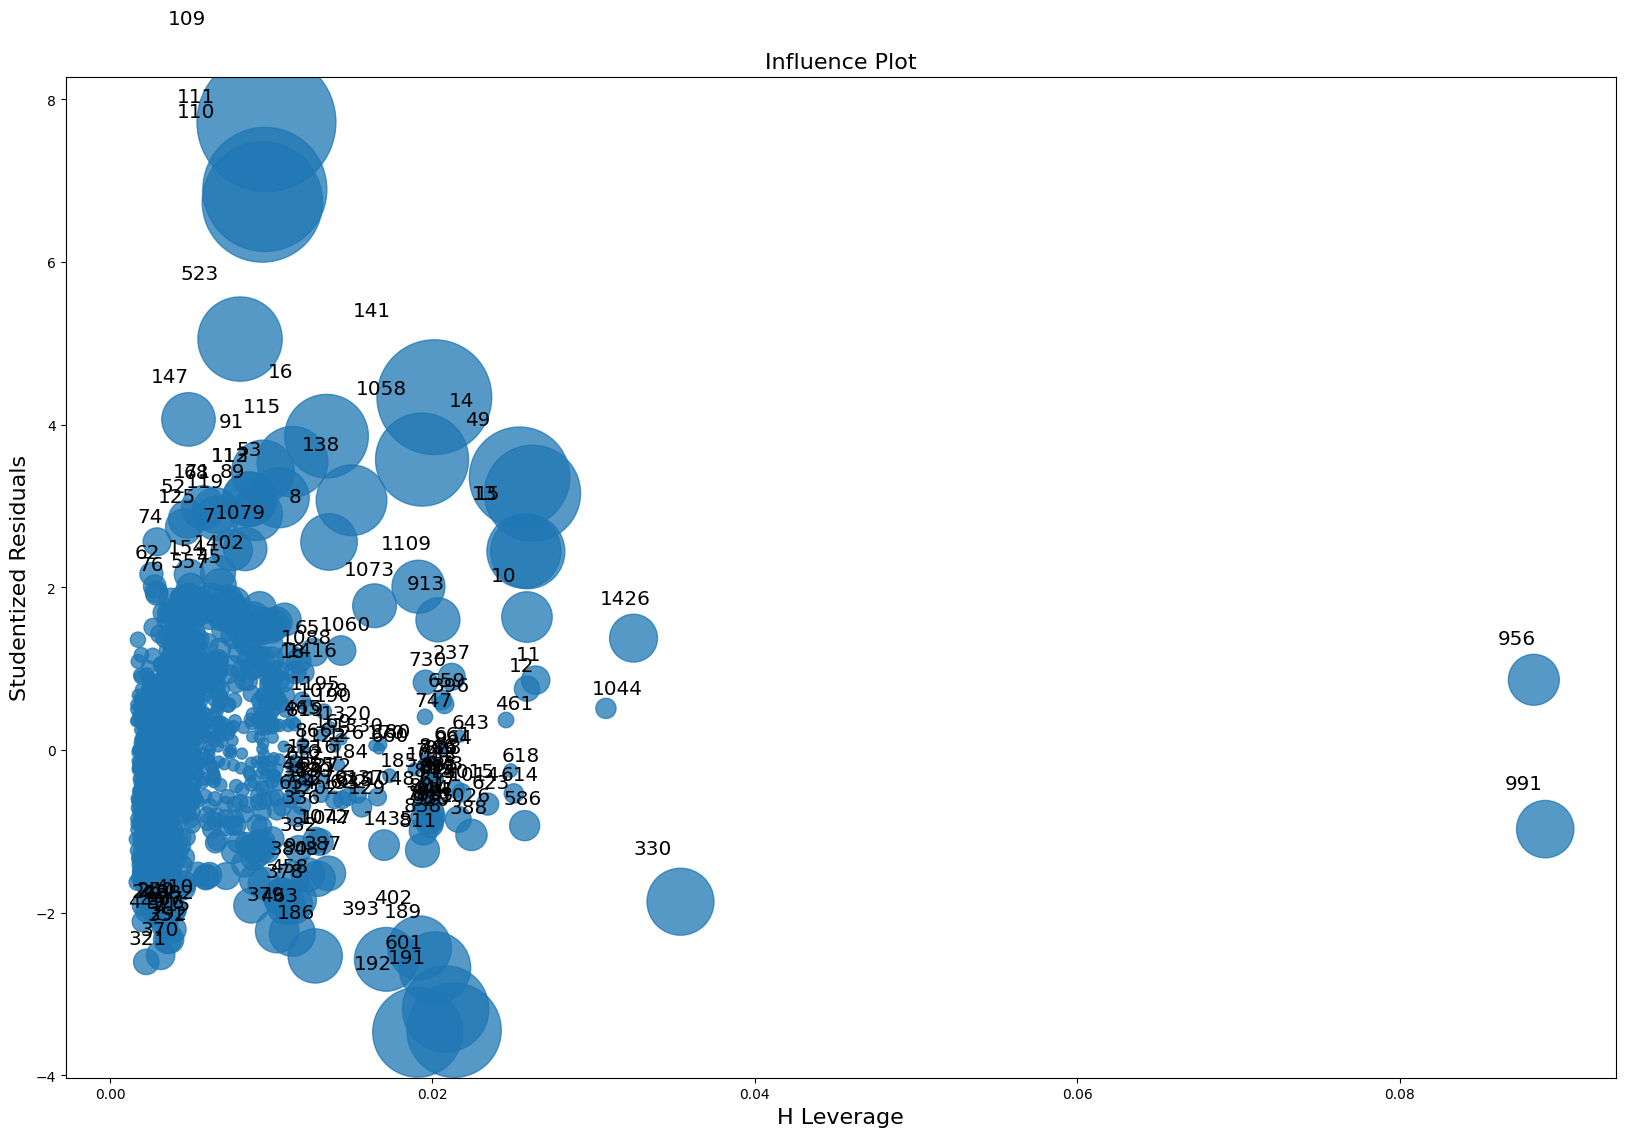

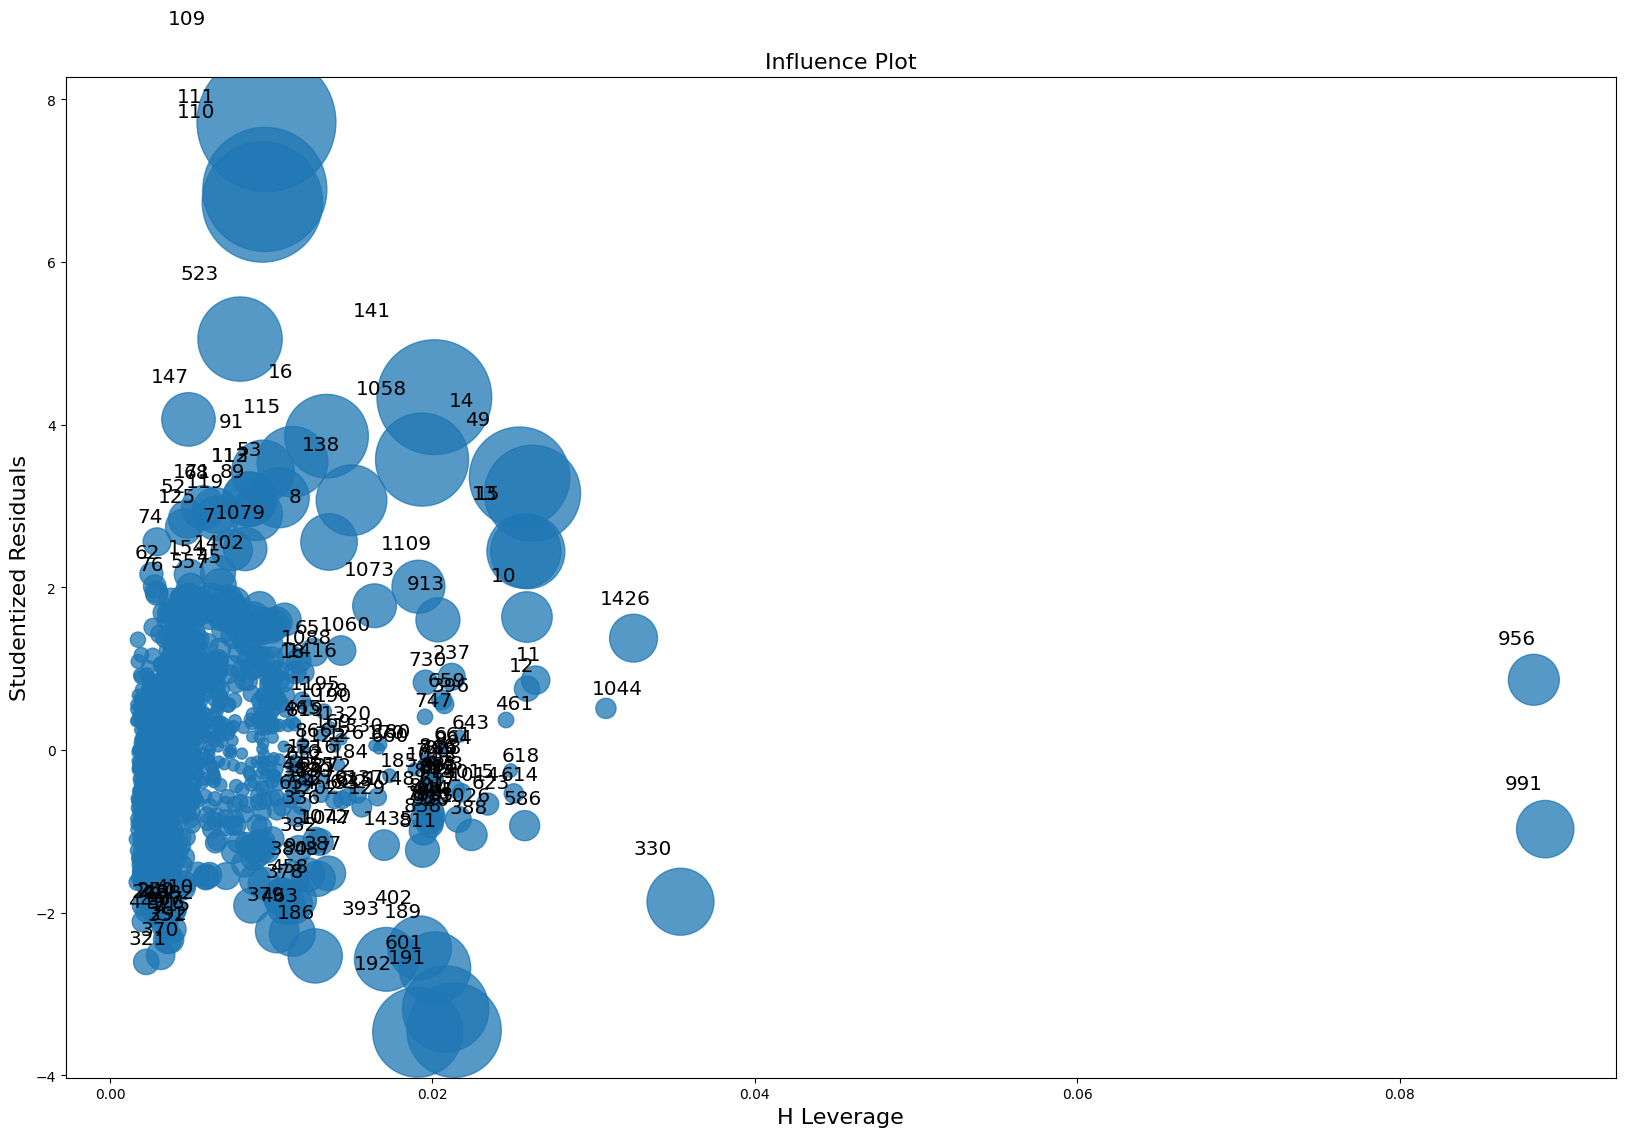

In [42]:
plt.rcParams["figure.figsize"] = (20,13)
sm.graphics.influence_plot(basemodel2, size=100, plot_alpha=0.75)

In [43]:
# Remove few influential observations to tune the model and verify 
clean_data1_new = clean_data1.drop(clean_data1.index[[109, 111, 110, 956, 991, 523, 141, 1426, 1044, 330]])
Y_new = Y.drop(Y.index[[109, 111, 110, 956, 991, 523, 141, 1426, 1044, 330]])

In [44]:
# Build model on new dataset
basemodel3 = sm.OLS(Y_new, clean_data1_new).fit()
basemodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1009.
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:48:50   Log-Likelihood:                -12378.
No. Observations:                1426   AIC:                         2.477e+04
Df Residuals:                    1418   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8319.8512   1231.401      6.756      0.000    5904.289    1.07e+04
Age_08_04      -138.5094      2.660    -52.079      0.000    -143.727    -133.292
KM               -0.0193      0.002    -12.752      0.000      -0.022      -0.016
HP               28.7500      3.377      8.515      0.000      22.126      35.374
cc                0.4532      0.305      1.487      0.137      -0.145       1.051
Doors           120.3017     43.128      2.789      0.005      35.701     204.903
Quarterly_Tax    28.3270      3.584      7.904      0.000      21.297      35.357
Gears          1013.2242    236.561      4.283      0.000     549.178    1477.270
==============================================================================
Omnibus:                       98.880   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.953
Skew:                           0.461   Prob(JB):                     1.71e-43
Kurtosis:                       4.570   Cond. No.                     2.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# R-squared: 0.833

# Regularization Techniques: LASSO, RIDGE and Elasticnet Regression

## LASSO MODEL

In [46]:
lasso = Lasso(alpha = 0.13, normalize = True)

In [48]:
lasso.fit(clean_data1_new, Y_new)

Lasso(alpha=0.13, normalize=True)

In [49]:
# Coefficient values for all independent variables
lasso.coef_

array([ 0.00000000e+00, -1.38491186e+02, -1.91617339e-02,  2.86236460e+01,
        4.29075388e-01,  1.15778279e+02,  2.81863379e+01,  9.83486205e+02])

In [50]:
lasso.intercept_

array([8537.40686533])

<BarContainer object of 8 artists>

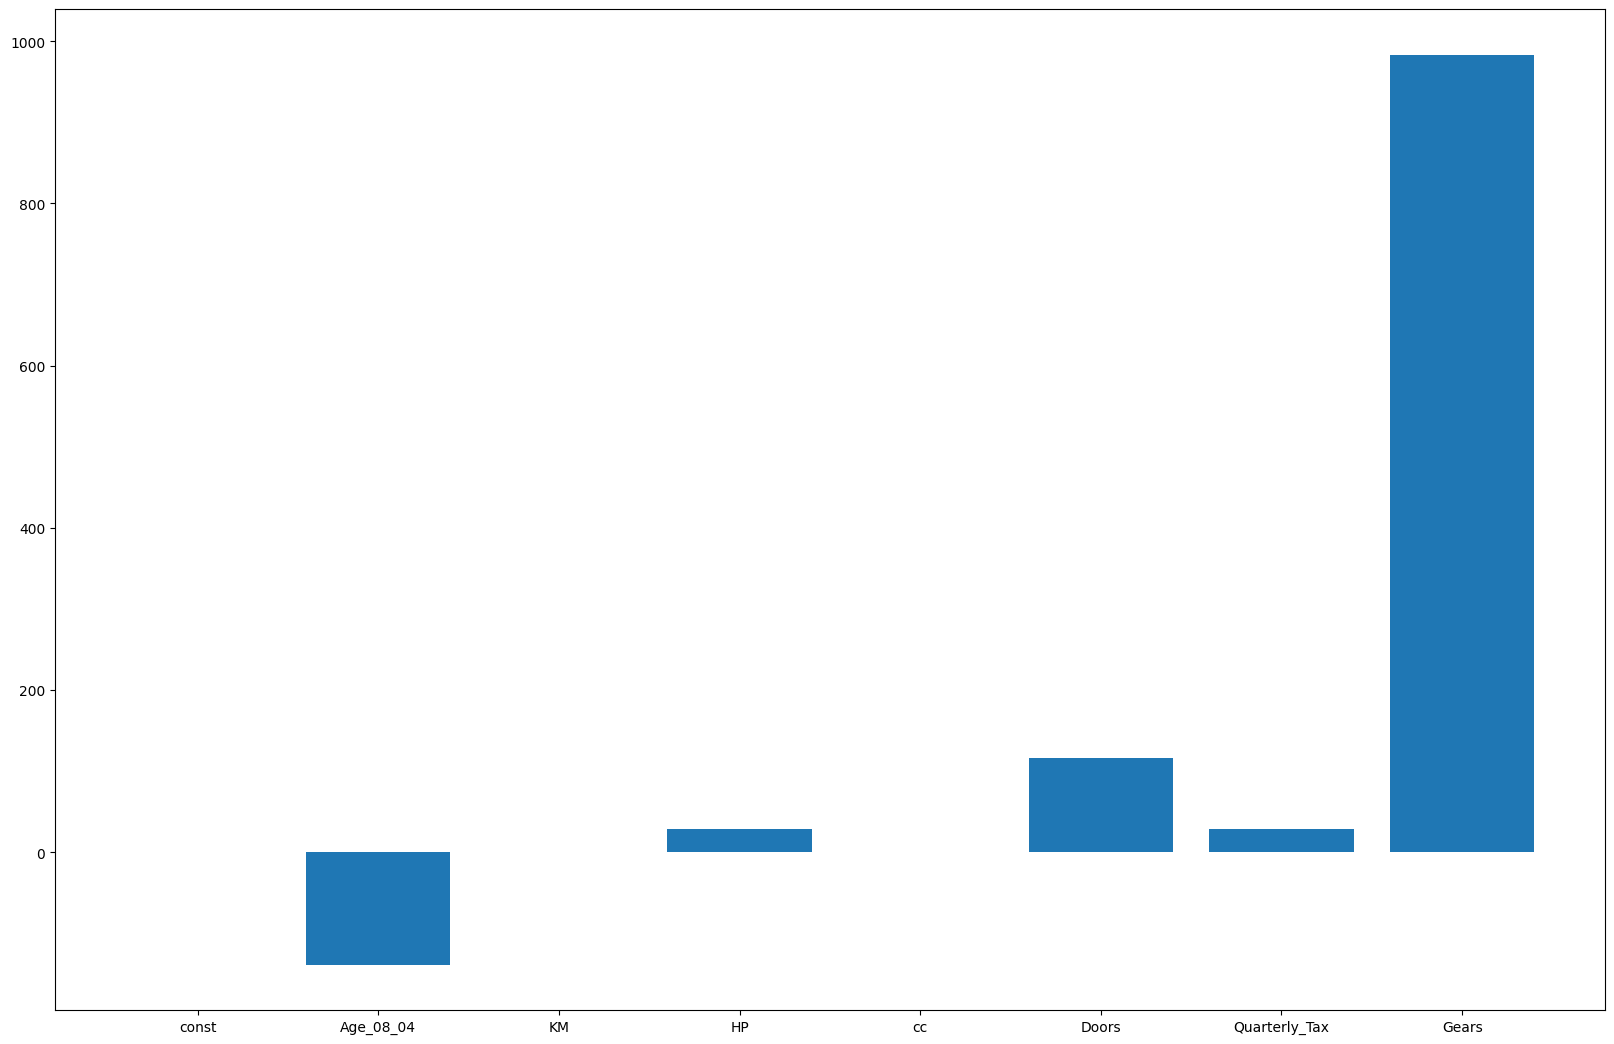

In [51]:
plt.bar(height = pd.Series(lasso.coef_), x = pd.Series(clean_data1_new.columns))

In [52]:
# Create a function called lasso,
pred_lasso = lasso.predict(clean_data1_new)

In [54]:
# Adjusted r-square
s1 = lasso.score(clean_data1_new, Y_new)
s1

0.8328070932476767

In [55]:
# RMSE
np.sqrt(np.mean((pred_lasso - np.array(Y_new['Price']))**2))

1423.8861264978016

## RIDGE REGRESSION

In [56]:
rm = Ridge(alpha = 0.13, normalize = True)

In [57]:
rm.fit(clean_data1_new, Y_new)

Ridge(alpha=0.13, normalize=True)

In [58]:
# Coefficients values for all the independent vairbales
rm.coef_

array([[ 0.00000000e+00, -1.19408486e+02, -2.25847499e-02,
         2.55003467e+01,  7.98078798e-01,  1.43839010e+02,
         2.85648359e+01,  9.36239876e+02]])

In [59]:
result = rm.coef_.flatten()

In [60]:
rm.intercept_

array([7534.87840899])

<BarContainer object of 8 artists>

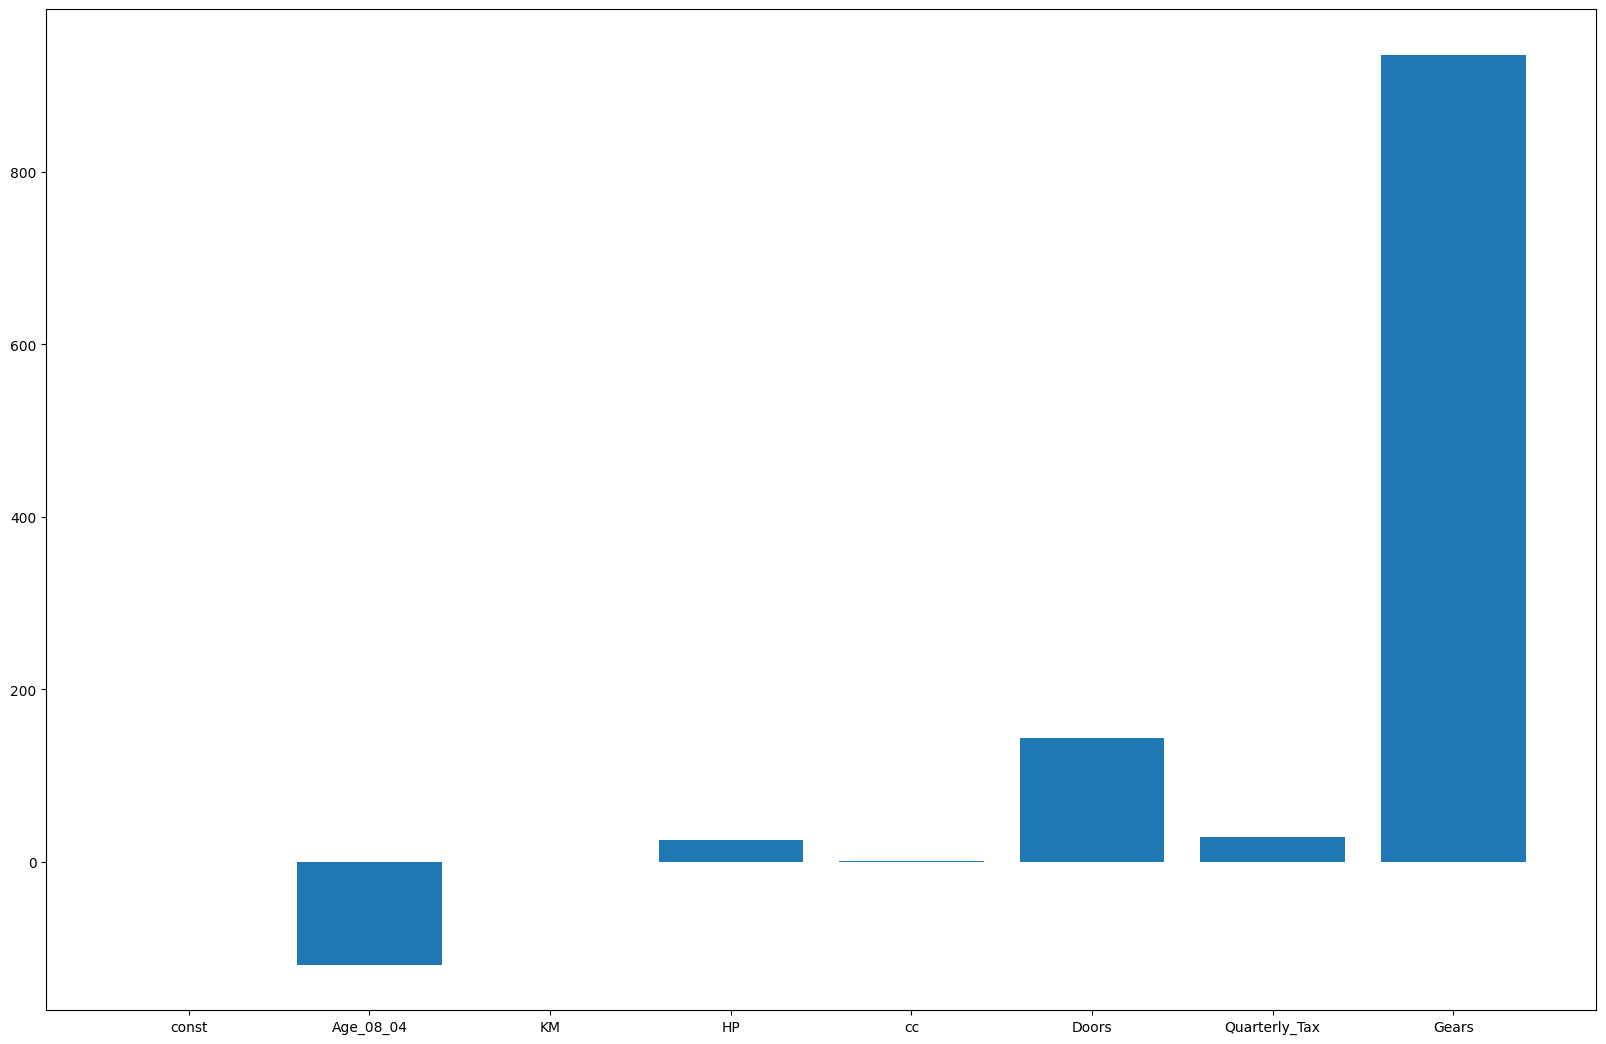

In [61]:
plt.bar(height = pd.Series(result), x = pd.Series(clean_data1_new.columns))

In [62]:
pred_rm = rm.predict(clean_data1_new)

In [64]:
# Adjusted r-square
s2 = rm.score(clean_data1_new, Y_new.Price)
s2

0.82541288830747

In [65]:
# RMSE
np.sqrt(np.mean((pred_rm - np.array(Y_new['Price']))**2))

4541.751575331857

## ELASTIC NET REGRESSION

In [66]:
enet = ElasticNet(alpha = 0.13)

In [67]:
enet.fit(clean_data1_new, Y_new.Price) 

ElasticNet(alpha=0.13)

In [68]:
# Coefficients values for all the independent vairbales
enet.coef_

array([ 0.00000000e+00, -1.38441600e+02, -1.90941978e-02,  3.12960091e+01,
        3.95231038e-01,  8.08484642e+01,  3.03668970e+01,  2.82636777e+02])

In [69]:
enet.intercept_

11805.713755061348

<BarContainer object of 8 artists>

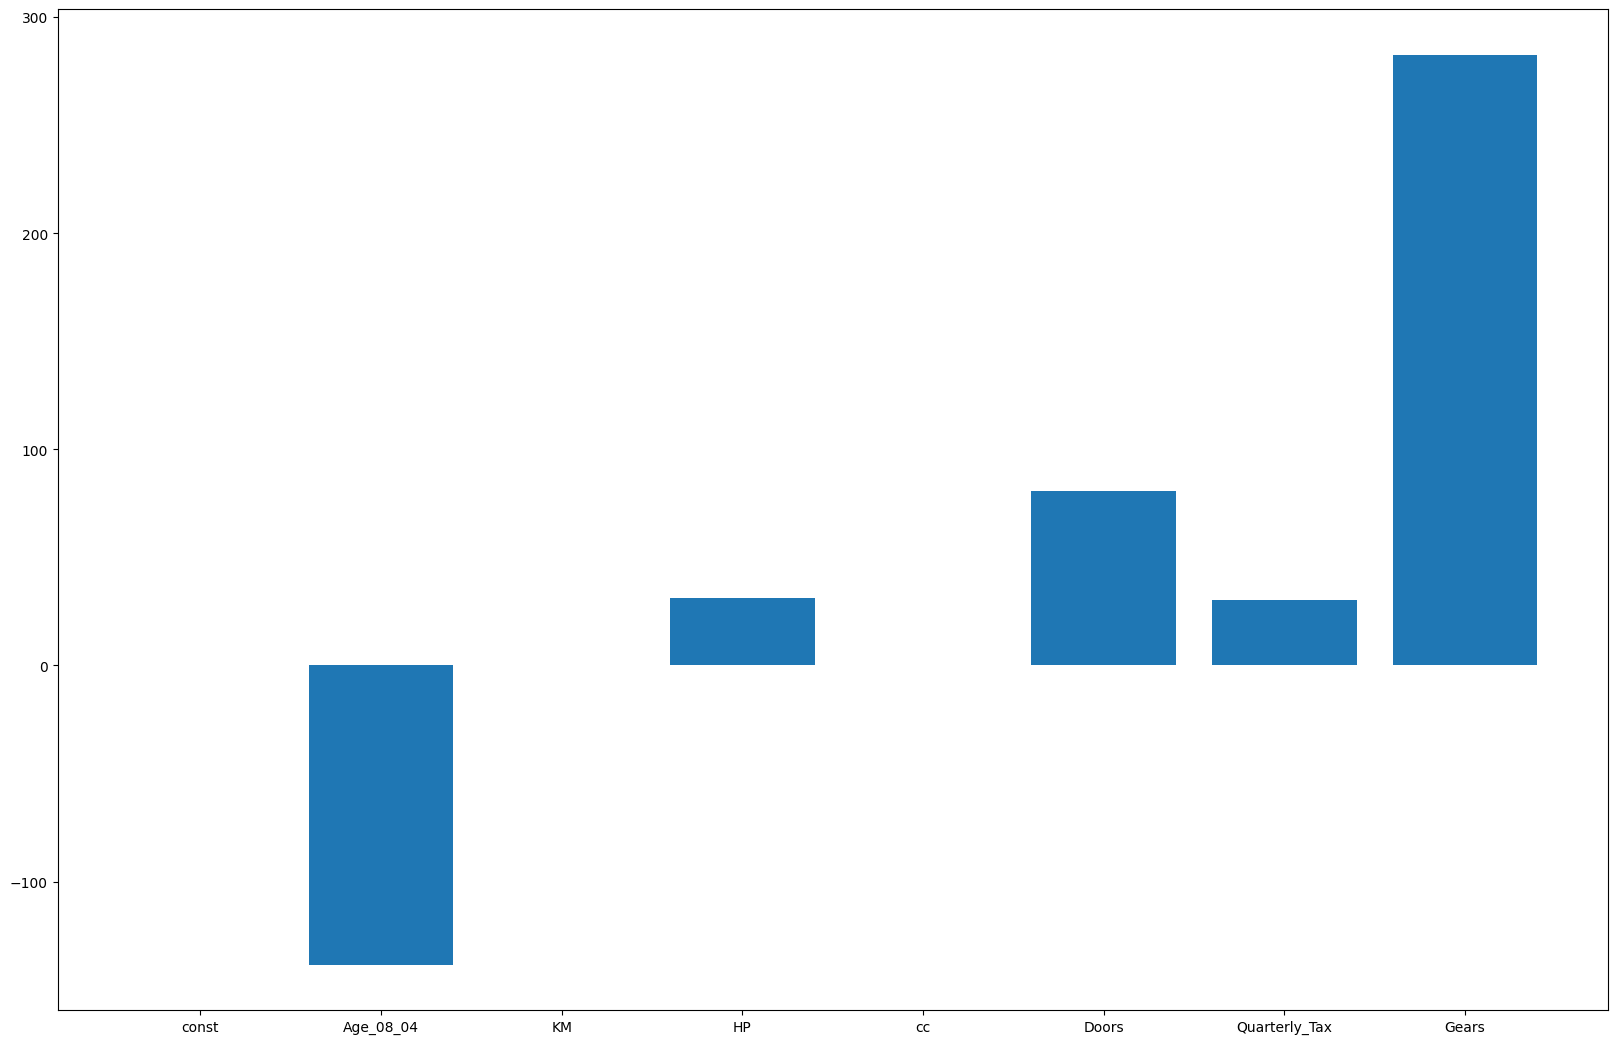

In [70]:
plt.bar(height = pd.Series(enet.coef_), x = pd.Series(clean_data1_new.columns))

In [71]:
pred_enet = enet.predict(clean_data1_new)

In [73]:
# Adjusted r-square
s3 = enet.score(clean_data1_new, Y_new.Price)
s3

0.8316890366183889

In [74]:
# RMSE
np.sqrt(np.mean((pred_enet - np.array(Y_new.Price))**2))

1428.639117293921

## Lasso Regression with GridSearchCV

In [75]:
lasso = Lasso()

In [76]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

In [77]:
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'r2', cv = 5)

In [78]:
lasso_reg.fit(clean_data1_new, Y_new.Price)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [79]:
lasso_reg.best_params_

{'alpha': 20}

In [80]:
lasso_reg.best_score_

-0.10992327824753594

In [81]:
lasso_pred = lasso_reg.predict(clean_data1_new)

In [83]:
# Adjusted r-square#
s4 = lasso_reg.score(clean_data1_new, Y_new.Price)
s4

0.8313833865737166

In [85]:
# RMSE
np.sqrt(np.mean((lasso_pred - np.array(Y_new.Price))**2))


1429.9357219164042

## Ridge Regression with GridSearchCV

In [86]:
ridge = Ridge()

In [87]:
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'r2', cv = 5)

In [88]:
ridge_reg.fit(clean_data1_new, Y_new.Price)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [89]:
ridge_reg.best_params_

{'alpha': 20}

In [90]:
ridge_reg.best_score_

-0.11204887166067042

In [91]:
ridge_pred = ridge_reg.predict(clean_data1_new)

In [92]:
# Adjusted r-square#
s5 = ridge_reg.score(clean_data1_new, Y_new.Price)
s5

0.832542085566837

In [93]:
# RMSE
np.sqrt(np.mean((ridge_pred - np.array(Y_new.Price))**2))

1425.0141389257558

## ElasticNet Regression with GridSearchCV

In [94]:
enet = ElasticNet()

In [95]:
enet_reg = GridSearchCV(enet, parameters, scoring = 'r2', cv = 5)

In [96]:
enet_reg.fit(clean_data1_new, Y_new.Price)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='r2')

In [97]:
enet_reg.best_params_

{'alpha': 20}

In [98]:
enet_reg.best_score_

-0.07586132646338524

In [99]:
enet_pred = enet_reg.predict(clean_data1_new)

In [101]:
# Adjusted r-square
s6 = enet_reg.score(clean_data1_new, Y_new.Price)
s6

0.8295395619373872

In [102]:
# RMSE
np.sqrt(np.mean((enet_pred - np.array(Y_new.Price))**2))

1437.732646909561

In [103]:
scores_all = pd.DataFrame({'models':['Lasso', 'Ridge', 'Elasticnet', 'Grid_lasso', 'Grid_ridge', 'Grid_elasticnet'], 'Scores':[s1, s2, s3, s4, s5, s6]})
scores_all

,models,Scores
0,Lasso,0.832807
1,Ridge,0.825413
2,Elasticnet,0.831689
3,Grid_lasso,0.831383
4,Grid_ridge,0.832542
5,Grid_elasticnet,0.829540


In [ ]:
# 'Best score obtained is for Lasso Regression'

In [107]:
np.sort(scores_all.Scores)

array([0.82541289, 0.82953956, 0.83138339, 0.83168904, 0.83254209,
       0.83280709])